# Download traininng and testing data from the below website (4 files)

[MNIST - Yann Lecun](http://yann.lecun.com/exdb/mnist/)

In [0]:
!pip install python-mnist

# Importing Packages

In [0]:
%matplotlib inline
from mnist import MNIST # Package: python-mnist
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Defining Helper Functions

1. Sigmoid
2. ReLU (Rectified Linear Unit)
3. Derivative of the Sigmoid
4. Derivative of the ReLU

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

# Importing the MNIST dataset

- The package python-mnist is used to import the images and labels
- The images and labels are converted to numpy arrays and reshaped into appropiate shapes

In [0]:
data = MNIST("./")
images, labels = data.load_training()
images_array = np.array(images).reshape((60000,784))
labels_array = np.array(labels).reshape((60000,1))

# Splitting Dataset into Training and Cross - Validation
- The function "train_test_split" from the package scikit-learn is used to train the dataset into training and cross - validation sets.
- The cross validation set size chosen here is 20% of the total set size.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(images_array, labels_array, test_size=0.2)

# Processing of Dataset
- The training imagea and labels are reshaped into appropiate shapes.
- The norm of every training example is computed using the norm() function from NumPy's Linear Algebra library.
- The training data is normalized.
- The training labels are one hot encoded using the get_dummies() function from Pandas.

In [0]:
X = X_train.T # (784,48000)
X_norm = np.linalg.norm(X, axis=0)
X = X / X_norm
Y_train = Y_train.T # (10, 48000)
Y = pd.get_dummies(Y_train.reshape((48000))).values.reshape((10,48000))

In [0]:
print("Shape of training data and labels is {} {}".format(X.shape, Y.shape))

Shape of training data and labels is (784, 48000) (10, 48000)


# Specifying the Layers of the Neural Network
- The input layer has 784 neurons.
- The first hidden layer has 10 hidden neurons.
- The second hidden layer has 10 neurons.
- The output layer has 10 neurons.

In [0]:
m = X.shape[1]
n_h1 = 10 # Number of neurons in first hidden layer
n_h2 = 10 # Number of neurons in second hidden layer

# Initializing the Parameters of the model
- The weights are randomly initialized.
- The biases are set to zeros.

In [0]:
W1 = np.random.randn(n_h1, X.shape[0])
b1 = np.zeros((n_h1, 1))
W2 = np.random.randn(n_h2, n_h1)
b2 = np.zeros((n_h2, 1))
W3 = np.random.randn(Y.shape[0],n_h2)
b3 = np.zeros((Y.shape[0], 1))

print("Shape of W1: {}".format(W1.shape))
print("Shape of b2: {}".format(b2.shape))
print("Shape of W2: {}".format(W2.shape))
print("Shape of b2: {}".format(b2.shape))
print("Shape of W3: {}".format(W3.shape))
print("Shape of b3: {}".format(b3.shape))

Shape of W1: (10, 784)
Shape of b2: (10, 1)
Shape of W2: (10, 10)
Shape of b2: (10, 1)
Shape of W3: (10, 10)
Shape of b3: (10, 1)


# Specifying the hyperparameters of the model

- An epoch is a single pass through the training set.
- The learning rate is set to 0.1 since this is the most optimal for the current model.
  - Different Learning Rates can be iterated through and graph of the cost function against the number of epochs can be compared to choose the most optimal value.




In [0]:
epochs = 1000
learning_rate = 0.1
epochs_list = np.zeros(1000)
cost_list = np.zeros(1000)

# Forward Propogation and Backpropogation
- Batch Gradient Descent is used here for forward propogation.
- The backpropogation algorithm is used to compute the gradients.
- The weights and biases are updated using the update rules.

In [0]:
for i in range(epochs):
    epochs_list[i] = i
    # Forward Pass

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cost = (-1/m) * np.sum(Y*np.log(A3) + (1-Y) * np.log(1-A3))
    cost = np.squeeze(cost)
    cost_list[i] = cost

    # Backward Pass
    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
    dZ3 = np.multiply(dA3, sigmoid_derivative(Z3))
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, relu_derivative(Z2))
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, relu_derivative(Z1))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

    # Updating the parameters

    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)

    if i % 100 == 0:
        print("Cost after {} iterations {}".format(i, cost))


Cost after 0 iterations 18.62244267590173
Cost after 100 iterations 3.382316509978665
Cost after 200 iterations 3.306961916444878
Cost after 300 iterations 3.2848731564154434
Cost after 400 iterations 3.2740561786842504
Cost after 500 iterations 3.268008054671692
Cost after 600 iterations 3.2640811400782415
Cost after 700 iterations 3.261306369009184
Cost after 800 iterations 3.259220597660957
Cost after 900 iterations 3.257613836842486


# Calculation of Training Accuracy

In [0]:
training_accuracy = 100 - (np.mean(np.abs(Y - A3)) * 100)
train_accuracy_string = str(training_accuracy)
print("Training Accuracy: {} %".format(training_accuracy))

Training Accuracy: 81.92246004337034


# Plotting of the Cost Function against Number of Epochs

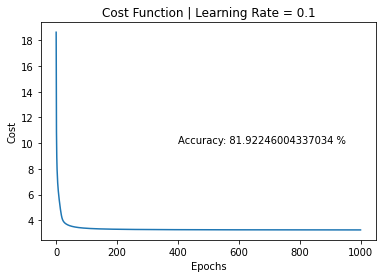

In [0]:
plt.plot(epochs_list, cost_list)
plt.title("Cost Function | Learning Rate = " + str(learning_rate))
plt.text(400, 10, "Accuracy: " + train_accuracy_string + " %")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# Processing the Cross - Validation Dataset
- The cross - validation images and labels are reshaped into appropiate shapes.
- The norm of every cross - validation example is computed using the norm() function from NumPy's Linear Algebra library.
- The cross - validationn data is normalized.
- The cross - validation labels are one hot encoded using the get_dummies() function from Pandas.

In [0]:
X_cross_final = X_test.T # (784,12000)
X_norm_cross = np.linalg.norm(X_cross_final, axis=0)
X_cross_final = X_cross_final / X_norm_cross
Y_cross_final = Y_test.T # (1, 12000)
Y_cross_final = pd.get_dummies(Y_cross_final.reshape((12000))).values.reshape((10,12000))

print("The Shape of the cross - validation set is: ", X_cross_final.shape)
print("The Shape of the cross - validation labels is: ", Y_cross_final.shape)

The Shape of the cross - validation set is:  (784, 12000)
The Shape of the cross - validation labels is:  (10, 12000)


# Forward Propogation for the Cross - Validation Dataset

The cross - validation dataset is passed through the neural network to obtain the network's predictions A3_test.

In [0]:
Z1_cross = np.dot(W1, X_cross_final) + b1
A1_cross = relu(Z1_cross)
Z2_cross = np.dot(W2, A1_cross) + b2
A2_cross = relu(Z2_cross)
Z3_cross = np.dot(W3, A2_cross) + b3
A3_cross = sigmoid(Z3_cross)

# Calculation of Cross - Validation Accuracy

In [0]:
print("The cross - validation accuracy is: {} %".format(100 - (np.mean(np.abs(Y_cross_final - A3_cross)) * 100)))

The cross - validation accuracy is: 81.91186441290175 %


# Importing the Testing Dataset
- The testing dataset is imported using the method load_testing() from the python-mnist package.
- The images and labels are converted into NumPy arrays.
- The labels array is reshaped into a 2-D Array from a 1-D Array.

In [0]:
images, labels = data.load_testing()
images_testing = np.array(images)
labels_testing = np.array(labels).reshape((10000,1))

(10000, 1)

# Processing the Testing Dataset
- The testing images and labels are reshaped into appropiate shapes.
- The norm of every testing example is computed using the norm() function from NumPy's Linear Algebra library.
- The testing data is normalized.
- The testing labels are one hot encoded using the get_dummies() function from Pandas.

In [0]:
X_test = images_testing.T # (784,10000)
X_norm_test = np.linalg.norm(X_test, axis=0)
X_test = X_test / X_norm_test
Y_test = labels_testing.T # (1, 10000)
Y_test = pd.get_dummies(Y_test.reshape((10000))).values.reshape((10,10000))

print("Shape of Testing Dataset: {}".format(X_test.shape))
print("Shape of Testing Label;s: {}".format(Y_test.shape))

Shape of Testing Dataset: (784, 10000)
Shape of Testing Label;s: (10, 10000)


In [0]:
Z1_test = np.dot(W1, X_test) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = relu(Z2_test)
Z3_test = np.dot(W3, A2_test) + b3
A3_test = sigmoid(Z3_test)

In [0]:
print("The testing accuracy is: {} %".format(100 - (np.mean(np.abs(Y_test - A3_test)) * 100)))

The testing accuracy is: 81.93185423853886 %
